Author: "Melanie Walsh".
Adapted by Yevgen Matusevych for the Collecting Data course at the University of Groningen.


# Pandas Basics Part 3 — Workbook

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 200

## Get Data

In [3]:
film_df = pd.read_csv('./data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [4]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
10866,Syriana,2005,Bryan Woodman,man,1607,0.092890,35.0,68.0,3492
554,Braveheart,1995,Campbell,man,186,0.031541,47.0,151.0,771
14384,Only You,1994,Himself (,man,276,0.023730,102.0,41.0,4758
21896,Pay the Ghost,2015,Kristen,woman,728,0.150631,38.0,NaN,8533
15325,Titanic,1997,Lizzy Calvert,woman,158,0.012632,35.0,1249.0,5136
8595,Lost Horizon,1937,Lord Gainsford,man,720,0.027489,56.0,NaN,2807
21827,Diabolique,1996,Mia Baran,woman,1477,0.237460,41.0,33.0,8513
11288,Twins,1988,Werner,man,358,0.045663,55.0,237.0,3625
15592,Where the Wild Things Are,2009,Carol,man,1506,0.261322,48.0,89.0,5221
8192,Larry Crowne,2011,Mercedes Tainot,woman,3056,0.230607,44.0,39.0,2733


Generate information about all the columns in the data 

In [5]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'words'}>],
       [<AxesSubplot:title={'center':'proportion_of_dialogue'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'script_id'}>]], dtype=object)

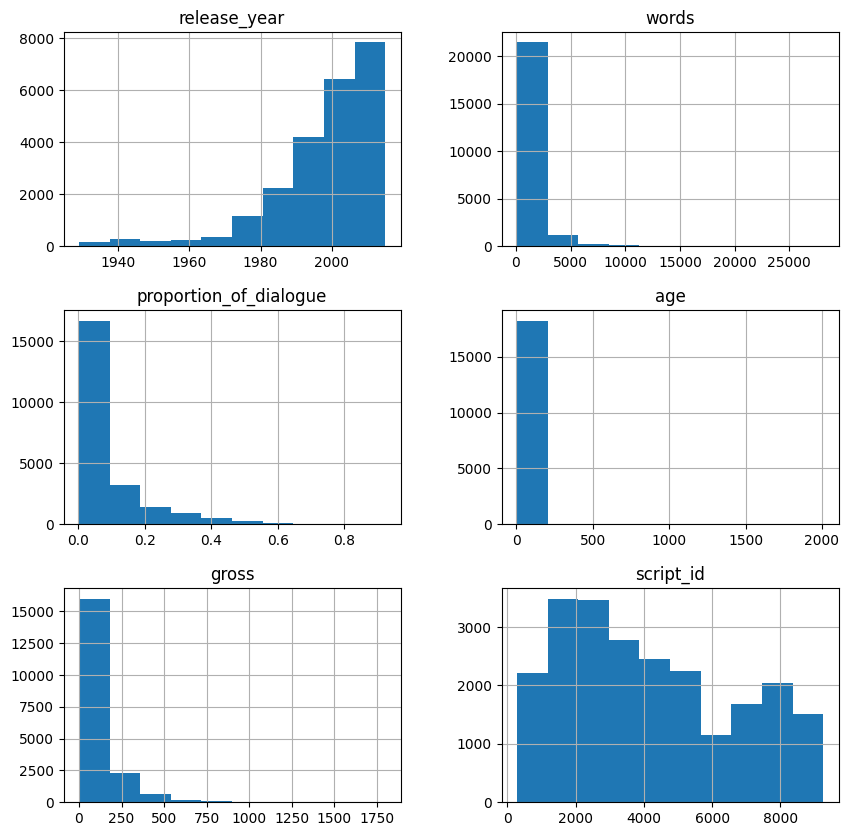

In [6]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [7]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

## Drop Rows

In [8]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [9]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [10]:
film_df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280
...,...,...,...,...,...,...,...,...,...
23042,Beauty and the Beast,1991,Lumiere,man,1063,0.104636,56.0,452.0,9254
23043,Beauty and the Beast,1991,Maurice,man,1107,0.108967,71.0,452.0,9254
23044,Beauty and the Beast,1991,Monsieur D'Arqu,man,114,0.011222,58.0,452.0,9254
23045,Beauty and the Beast,1991,Mrs. Potts,woman,564,0.055517,66.0,452.0,9254


In [11]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [12]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [13]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [179]:
film_filter = ...

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [ ]:
film_df[film_filter]

Now pick a character from this film (or another character) and filter the DataFrame by character.

In [179]:
character_filter = ...

In [ ]:
film_df[character_filter]

### ❓ How does this data align with your experience/knowledge of the film?
### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

## Sort Values

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Groupby

Group by film and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [ ]:
film_df.groupby...

## Filter, Then Groupby

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Filter the DataFrame for only characters labeled as `woman`

In [14]:
women_filter = film_df['gender'] == 'woman'

In [15]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [16]:
men_filter = film_df['gender'] == 'man'

In [17]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [18]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [19]:
women_by_film = women_film_df.groupby('title')['words'].sum()

Using the same construction, make a new another new variable `men_by_film`

In [20]:
men_by_film = men_film_df.groupby('title')['words'].sum()

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [21]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [22]:
top20_women = women_by_film.sort_values(ascending=False)[:20]

Using the same construction, make a new variable `top20_men`

In [23]:
top20_men = men_by_film.sort_values(ascending=False)[:20]

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Saving Plots

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<AxesSubplot:xlabel='title'>

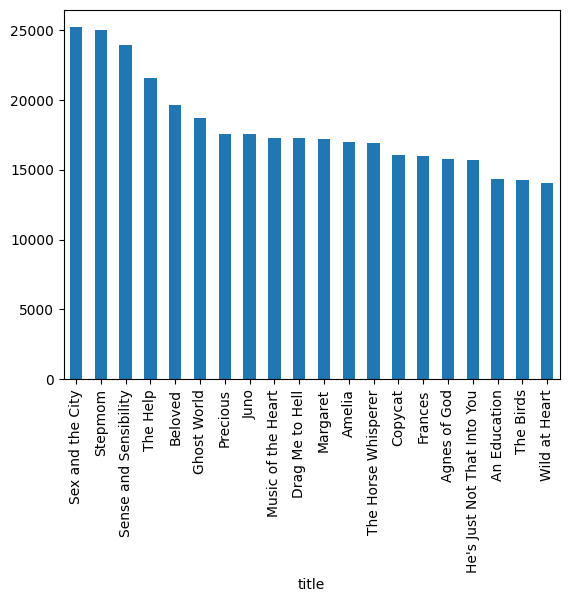

In [24]:
top20_women.plot(kind='bar')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

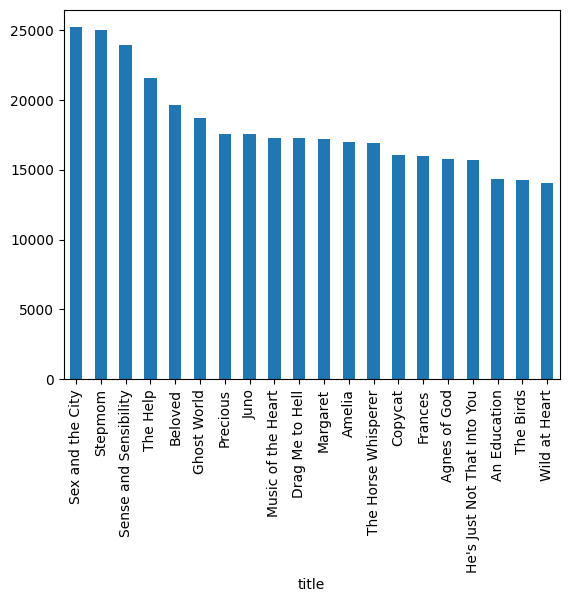

In [25]:
ax = top20_women.plot(kind='bar')
ax.figure.savefig('top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

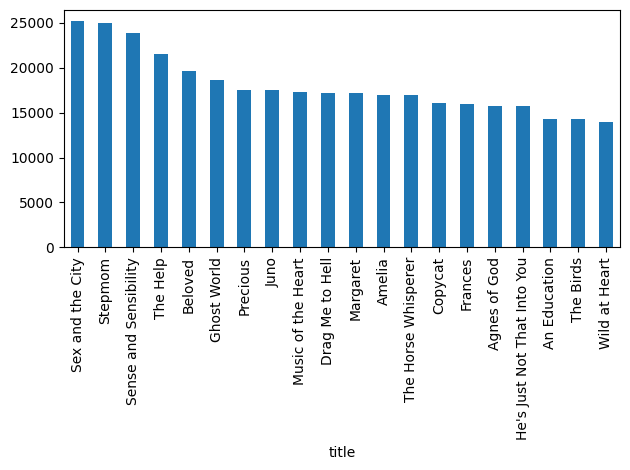

In [26]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [27]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [28]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [29]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<AxesSubplot:xlabel='age', ylabel='words'>

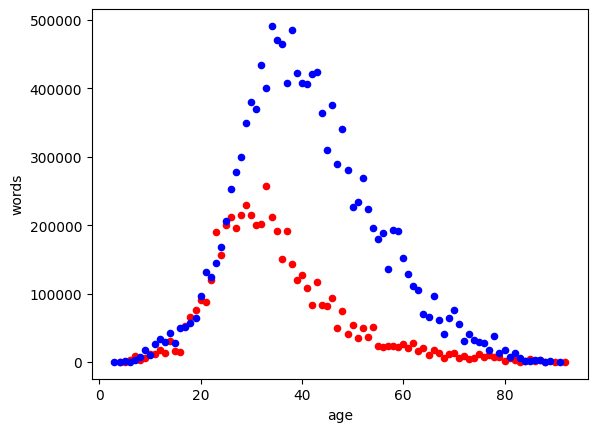

In [30]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

In [645]:
# Your code here
# Your code here

## Bonus — Interactive Data Visualization

[Bokeh](https://docs.bokeh.org/en/latest/index.html) is a powerful library for creating interactive visualizations. You may need to install it in your Anaconda Navigator or from the command line (``conda install bokeh``).

In [37]:
#Import necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.io import output_notebook, show
from bokeh.palettes import RdBu
from bokeh.transform import linear_cmap, jitter

In [38]:
#Set up Bokeh to work in Jupyter notebook
output_notebook()

Loading BokehJS ...

Here's an interactive data visualization of these Hollywood films by release year and percentage of women dialogue.

* Scroll to zoom in
* Hover to see more information about each point

In [39]:
#Make groupby into a new DataFrame
dialogue_df = women_film_df.groupby(['title', 'release_year'])[['proportion_of_dialogue']].sum()\
.sort_values(by='proportion_of_dialogue', ascending=False).reset_index()

# Set up the source data that will suppply the x,y columns and the film title hover text
source = ColumnDataSource(dialogue_df)

# Set the hover tool tip to the film title, release year, and proportion of dialogue

TOOLTIPS = [("Title", "@title"),
            ("Year", "@release_year"),
           ("Women Dialogue", "@{proportion_of_dialogue}{%0.2f}")]

#Set up Bokeh plot with title, labels, 
bokeh_plot = figure(title="How Much Do Women Speak in Hollywood Films?", x_axis_label = 'Film Release Year',
                    y_axis_label = 'Amount of Dialogue Spoken By Women',x_range = [1930, 2018], y_range = [0, 1.01],
                 tooltips=TOOLTIPS, width=800, height=550, active_scroll='wheel_zoom')

# Create a red to blue color palette
color_mapper = linear_cmap(field_name='proportion_of_dialogue', palette=RdBu[4], low=1.1, high=0)

# Supply inidivudal points values
bokeh_plot.circle(y='proportion_of_dialogue', x=jitter('release_year', width=.2),
         size = 10,
        line_color='black',
        line_alpha=.4,
         source=source,
         color=color_mapper, alpha=.5)

bokeh_plot.title.text_font_size='20pt'

#Make Y axis percentages
bokeh_plot.yaxis.formatter = NumeralTickFormatter(format='0 %')

show(bokeh_plot)